<a href="https://colab.research.google.com/github/jaylin0418/2025-IM-Camp/blob/main/intro_AI_knn_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 人工智慧導論 - K-Nearest Neighbors (KNN) 實作（監督式學習）

In [10]:
!pip install sklearn
!pip install matplotlib
!pip install numpy

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


### 1. 載入手寫數字數據集

我們將使用 ```sklearn``` 提供的手寫數字數據集，這個數據集包含 1797 張手寫的數字圖片，每張圖片是 8x8 的大小，經過展平後變成 64 維的向量。

In [3]:
from sklearn.datasets import load_digits

# 下載手寫數字數據集
digits = load_digits()

# 數字圖片的數據 (1797, 64)，每個數字是一個 8x8 的圖像展平為 64 維
data = digits.data

# 真實標籤 (0-9)，每張圖片對應的真實數字
labels = digits.target

這段程式碼會將數據集中的圖片數據 (data) 和對應的標籤 (labels) 分別存儲在 `data` 和 `labels` 變數中。

### 2. 使用 KNN 進行分類

KNN 是一種常見的分類方法。在這裡，我們會將數據集分成兩部分：訓練集（用來訓練模型）和測試集（用來測試模型的表現）。

In [4]:
from sklearn.model_selection import train_test_split

# 將數據集分為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)

在這裡，我們使用 ```train_test_split``` 函數將數據分成 70% 的訓練集和 30% 的測試集。

然後，我們定義 KNN 模型，並使用訓練集來進行訓練。這裡的 `k=3` 表示每次分類時會參考最近的 3 個鄰居。

In [5]:
from sklearn.neighbors import KNeighborsClassifier

# 定義 KNN 模型，選擇適當的 k 值
knn = KNeighborsClassifier(n_neighbors=3)

# 訓練 KNN 模型
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

這段程式碼建立了 KNN 模型並用訓練集數據來訓練它。

### 3. 預測結果並視覺化分類結果

一旦模型訓練完成，我們可以用測試集數據來進行預測。這裡的 ```predict``` 函數會返回模型對測試集每一張圖片的預測結果。

In [6]:
# 預測測試集的標籤
predicted_labels = knn.predict(X_test)

接下來，我們會隨機選擇 10 張測試集中的數字圖片，並顯示它們的分類結果。

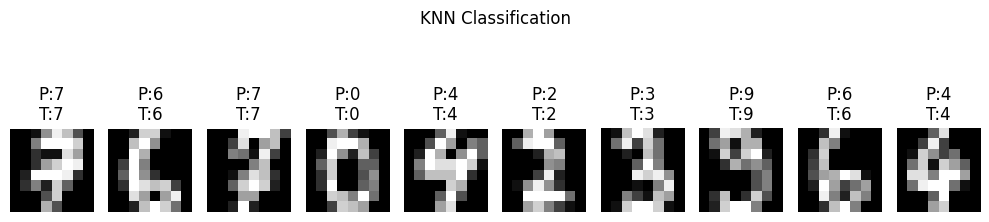

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# 定義顯示數字圖片的函數
def plot_digits(data, predicted_labels, true_labels, title):
    fig, axes = plt.subplots(1, 10, figsize=(10, 3))
    for i, ax in enumerate(axes):
        ax.set_axis_off()  # 關閉坐標軸
        ax.imshow(data[i].reshape(8, 8), cmap='gray')  # 顯示圖片
        ax.set_title(f"P:{predicted_labels[i]}\nT:{true_labels[i]}")  # 顯示預測結果與真實標籤
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# 隨機選擇 10 個數字，顯示其分類結果
rng = np.random.default_rng()
indices = rng.choice(len(X_test), size=10, replace=False)
plot_digits(X_test[indices], predicted_labels[indices], y_test[indices], "KNN Classification")

在這段程式碼中，我們隨機選擇 10 張圖片並顯示它們的預測標籤（`P`）和真實標籤（`T`）。這有助於我們理解模型的表現。

In [8]:
# 顯示預測標籤與真實標籤的比較
print("Predicted labels: ", predicted_labels[indices])
print("True labels:      ", y_test[indices])

Predicted labels:  [7 6 7 0 4 2 3 9 6 4]
True labels:       [7 6 7 0 4 2 3 9 6 4]


### 4. 計算分類準確率

最後，我們計算模型的準確率，即預測正確的數字佔總數字的比例。

In [9]:
from sklearn.metrics import accuracy_score

# 計算 KNN 分類準確率
accuracy = accuracy_score(y_test, predicted_labels)

# 輸出準確率
print(f"KNN 分類準確率: {accuracy * 100:.2f}%")

KNN 分類準確率: 98.89%


這段程式碼計算並顯示模型的準確率，告訴我們模型在測試集上的表現。